In [1]:
import pandas as pd
import numpy as np
import fastparquet
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Feature-Engineering_Transformation/Without_Feature_Engineering_false_Entry.parquet"
# Testing the Parquet Files
df=pd.read_parquet(path=path,engine="fastparquet")

In [3]:
df.shape

(1886845, 7)

In [4]:
df.head()

,Pickup_DateTime,Passenger_Count,Pickup_Lon,Pickup_Lat,Dropoff_Lon,Dropoff_Lat,Fare_Bin
index,,,,,,,
183041,2009-01-01 00:13:43,2,-74.009254,40.706161,-73.995110,40.760044,1
181137,2009-01-01 00:15:51,1,-73.940910,40.792622,-73.923622,40.743958,1
241421,2009-01-01 00:16:50,4,-73.981300,40.768108,-73.992531,40.751957,1
222602,2009-01-01 00:16:56,1,-73.998840,40.719589,-74.006203,40.714466,0
30701,2009-01-01 00:17:08,2,-73.965240,40.770863,-73.971161,40.766846,0


### Create Training and Testset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Fare_Bin"]), df["Fare_Bin"], test_size=0.2, random_state=1)

In [6]:
print("Shape of X_train" +" " + str(X_train.shape))
print("Shape of X_test" +" " + str(X_test.shape))
print("Shape of y_train" +" " + str(y_train.shape))
print("Shape of y_test" +" " + str(y_test.shape))

Shape of X_train (1509476, 6)
Shape of X_test (377369, 6)
Shape of y_train (1509476,)
Shape of y_test (377369,)


In [7]:
X_train.head()

,Pickup_DateTime,Passenger_Count,Pickup_Lon,Pickup_Lat,Dropoff_Lon,Dropoff_Lat
index,,,,,,
989143,2012-06-12 13:08:00,1,-73.992393,40.749615,-73.981773,40.758766
601098,2011-05-16 06:47:00,1,-73.963699,40.798126,-73.973564,40.792355
1449857,2014-01-08 14:14:00,1,-73.959610,40.771881,-73.979797,40.776112
888392,2012-04-13 12:21:00,2,-74.003754,40.737495,-73.979378,40.750145
1763118,2016-04-10 23:28:07,1,-73.990150,40.749989,-73.950470,40.706936


In [8]:
X_test.head()

,Pickup_DateTime,Passenger_Count,Pickup_Lon,Pickup_Lat,Dropoff_Lon,Dropoff_Lat
index,,,,,,
1829507,2016-02-08 16:54:18,1,-74.007881,40.724075,-74.006729,40.730755
969860,2012-02-23 15:10:00,2,-73.975456,40.755009,-73.959061,40.777870
1030974,2013-10-19 22:33:15,1,-73.992035,40.750412,-73.972534,40.749149
1871931,2016-02-06 21:25:10,3,-74.015640,40.714840,-74.008652,40.719120
1825593,2016-05-07 01:22:01,5,-73.978592,40.745087,-73.901176,40.745853


In [9]:
y_train.head()

index
989143     0
601098     0
1449857    0
888392     1
1763118    1
Name: Fare_Bin, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [10]:
y_test.head()

index
1829507    0
969860     0
1030974    1
1871931    0
1825593    1
Name: Fare_Bin, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

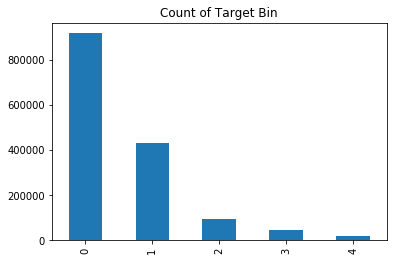

In [11]:
plt.title('Count of Target Bin')
y_train.value_counts().plot.bar()

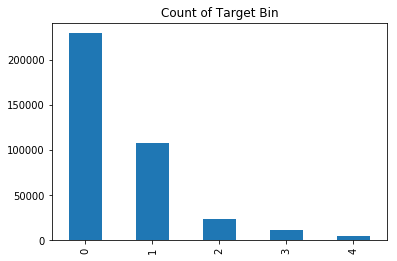

In [12]:
plt.title('Count of Target Bin')
y_test.value_counts().plot.bar()

### Create Numpy Array with most frequent Fare Bin as Value for Prediction
#### as Baseline

In [13]:
# Get Index of the most frequent Fare_Bin
Most_Frequent_Fare_Bin_Train=y_train.value_counts().idxmax()
Most_Frequent_Fare_Bin_Test=y_test.value_counts().idxmax()
# Create Numpy Array of Prediction
y_train_pred=np.empty(shape=len(y_train))
y_train_pred.fill(Most_Frequent_Fare_Bin_Train)
y_test_pred=np.empty(shape=len(y_test))
y_test_pred.fill(Most_Frequent_Fare_Bin_Test)

### Evaluation for Training Data

In [14]:
print("Accuracy: {:.3f}".format(accuracy_score(y_train,y_train_pred)))

Accuracy: 0.608


In [15]:
print("F1-Scores: {:.3f}".format(f1_score(y_train,y_train_pred,average="micro")))

F1-Scores: 0.608


In [16]:
print("Konfusionsmatrix:\n{}".format(confusion_matrix(y_train,y_train_pred)))

Konfusionsmatrix:
[[917599      0      0      0      0]
 [431488      0      0      0      0]
 [ 94033      0      0      0      0]
 [ 44655      0      0      0      0]
 [ 21701      0      0      0      0]]


In [17]:
print(classification_report(y_train,y_train_pred))

C:\Users\thu-bao\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.61      1.00      0.76    917599
           1       0.00      0.00      0.00    431488
           2       0.00      0.00      0.00     94033
           3       0.00      0.00      0.00     44655
           4       0.00      0.00      0.00     21701

    accuracy                           0.61   1509476
   macro avg       0.12      0.20      0.15   1509476
weighted avg       0.37      0.61      0.46   1509476



### Evaluation for Test Data

In [18]:
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_test_pred)))

Accuracy: 0.608


In [19]:
print("F1-Scores: {:.3f}".format(f1_score(y_test,y_test_pred,average="micro")))

F1-Scores: 0.608


In [20]:
print("Konfusionsmatrix:\n{}".format(confusion_matrix(y_test,y_test_pred)))

Konfusionsmatrix:
[[229452      0      0      0      0]
 [107804      0      0      0      0]
 [ 23647      0      0      0      0]
 [ 11161      0      0      0      0]
 [  5305      0      0      0      0]]


In [21]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76    229452
           1       0.00      0.00      0.00    107804
           2       0.00      0.00      0.00     23647
           3       0.00      0.00      0.00     11161
           4       0.00      0.00      0.00      5305

    accuracy                           0.61    377369
   macro avg       0.12      0.20      0.15    377369
weighted avg       0.37      0.61      0.46    377369

